<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE NECESSARY LIBRARIES

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [3]:
# Importing the dataset
data = pd.read_csv("/content/data - data.csv")

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


EXPLORATORY DATA ANALYSIS

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.shape

(4600, 18)

In [8]:
data['price']     = data['price'].astype('int64')
data['bedrooms']  = data['bedrooms'].astype('int64')
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')
data['street']    = data['street'].astype('string')
data['city']      = data['city'].astype('string')
data['statezip']  = data['statezip'].astype('string')
data['country']   = data['country'].astype('string')

In [9]:
data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 0:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 0:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 0:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [13]:
data['price'].replace(0, np.nan, inplace = True)

In [14]:
data.dropna(inplace=True)
(data.price == 0).sum()

0

<ipython-input-16-67930efe7a61>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


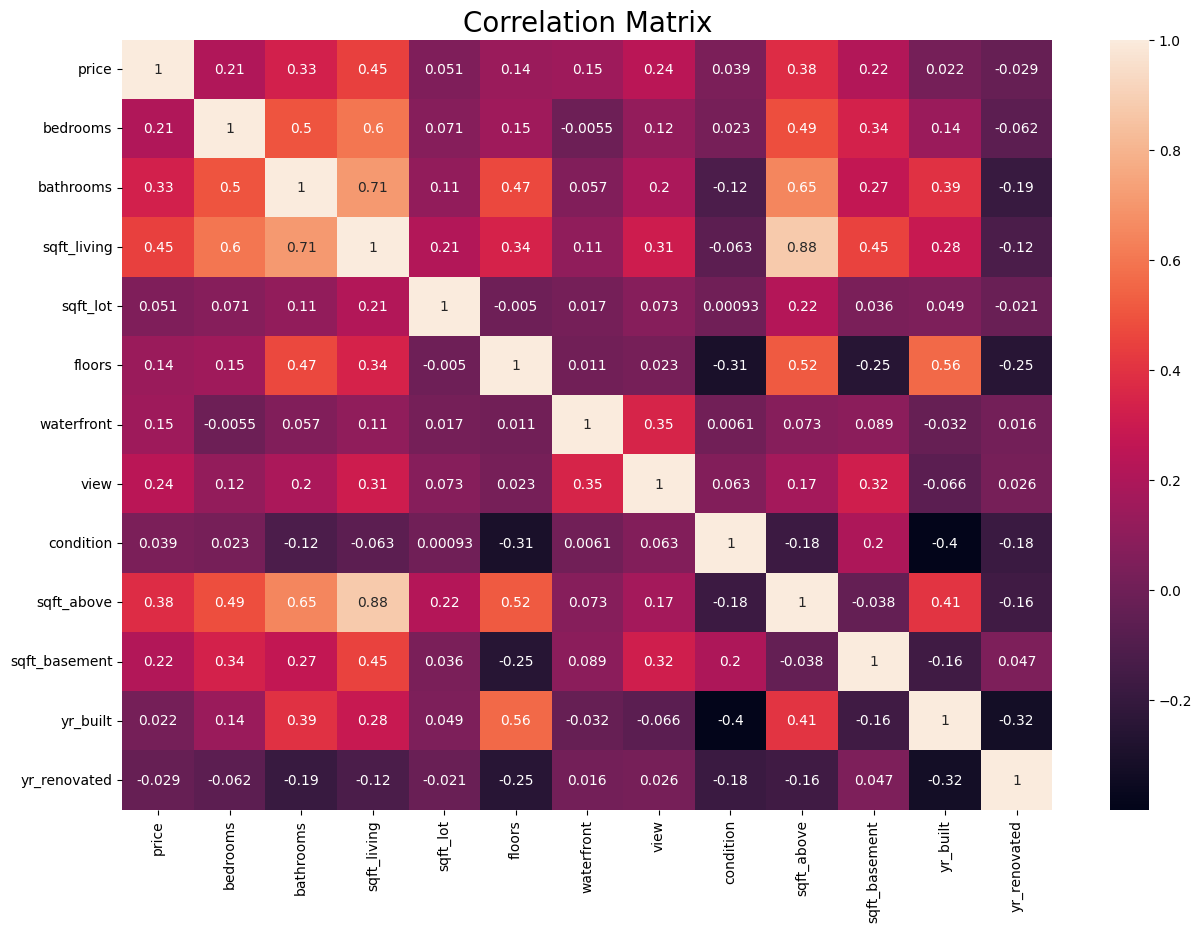

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix', size=20)
plt.yticks(rotation = 0)
plt.show()

Attributes such as "sqft_above" and "sqft_living" have a strong positive correlation

<ipython-input-60-29a5ad5cee90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"])


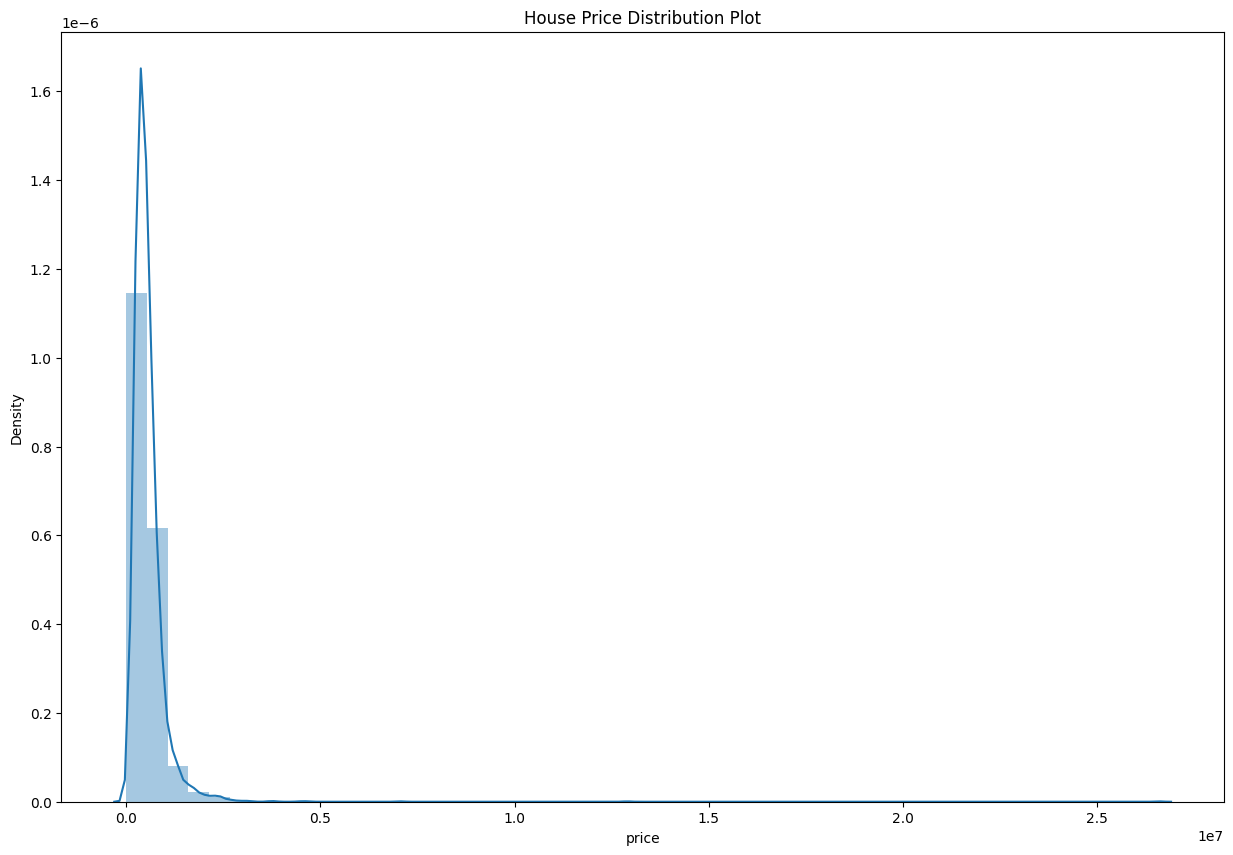

In [60]:
plt.figure(figsize=(15,10))
plt.title('House Price Distribution Plot')
sns.distplot(data["price"])
plt.show()

In [18]:
#Function to plot Categorical Data Types
def Categorical_Plot(column,rotation=0):

        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        pd.value_counts(data[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2, 2)
        sns.barplot(x = data[column], y = data.price)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

In [19]:
# Function to plot scatter plots and boxplots for all the numerical data types
def Numerical_Plot(column):

        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=data[column],y=data["price"],hue=data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

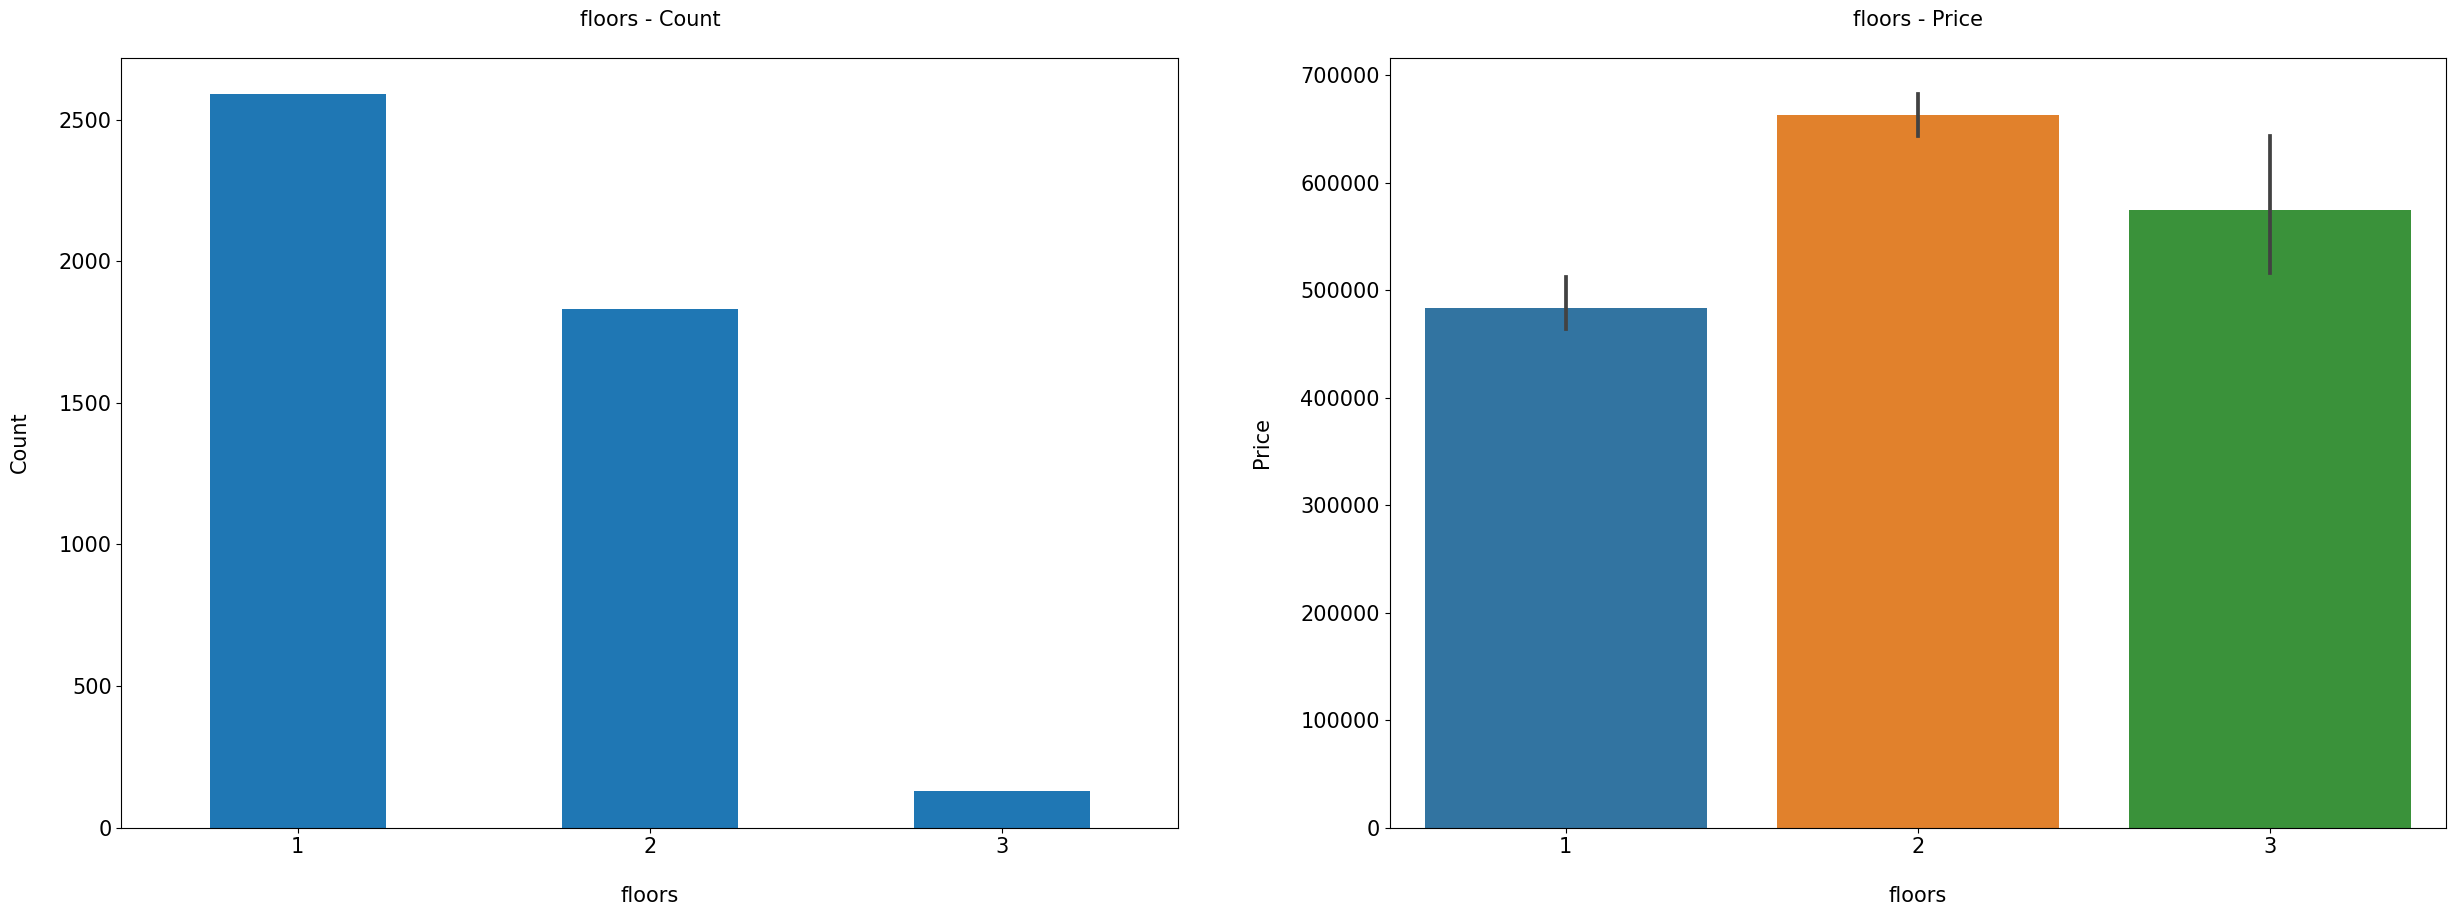

In [22]:
Categorical_Plot("floors")

We can see that 1 floor houses are the most frequent and also the prices of 2 floor houses are the highest

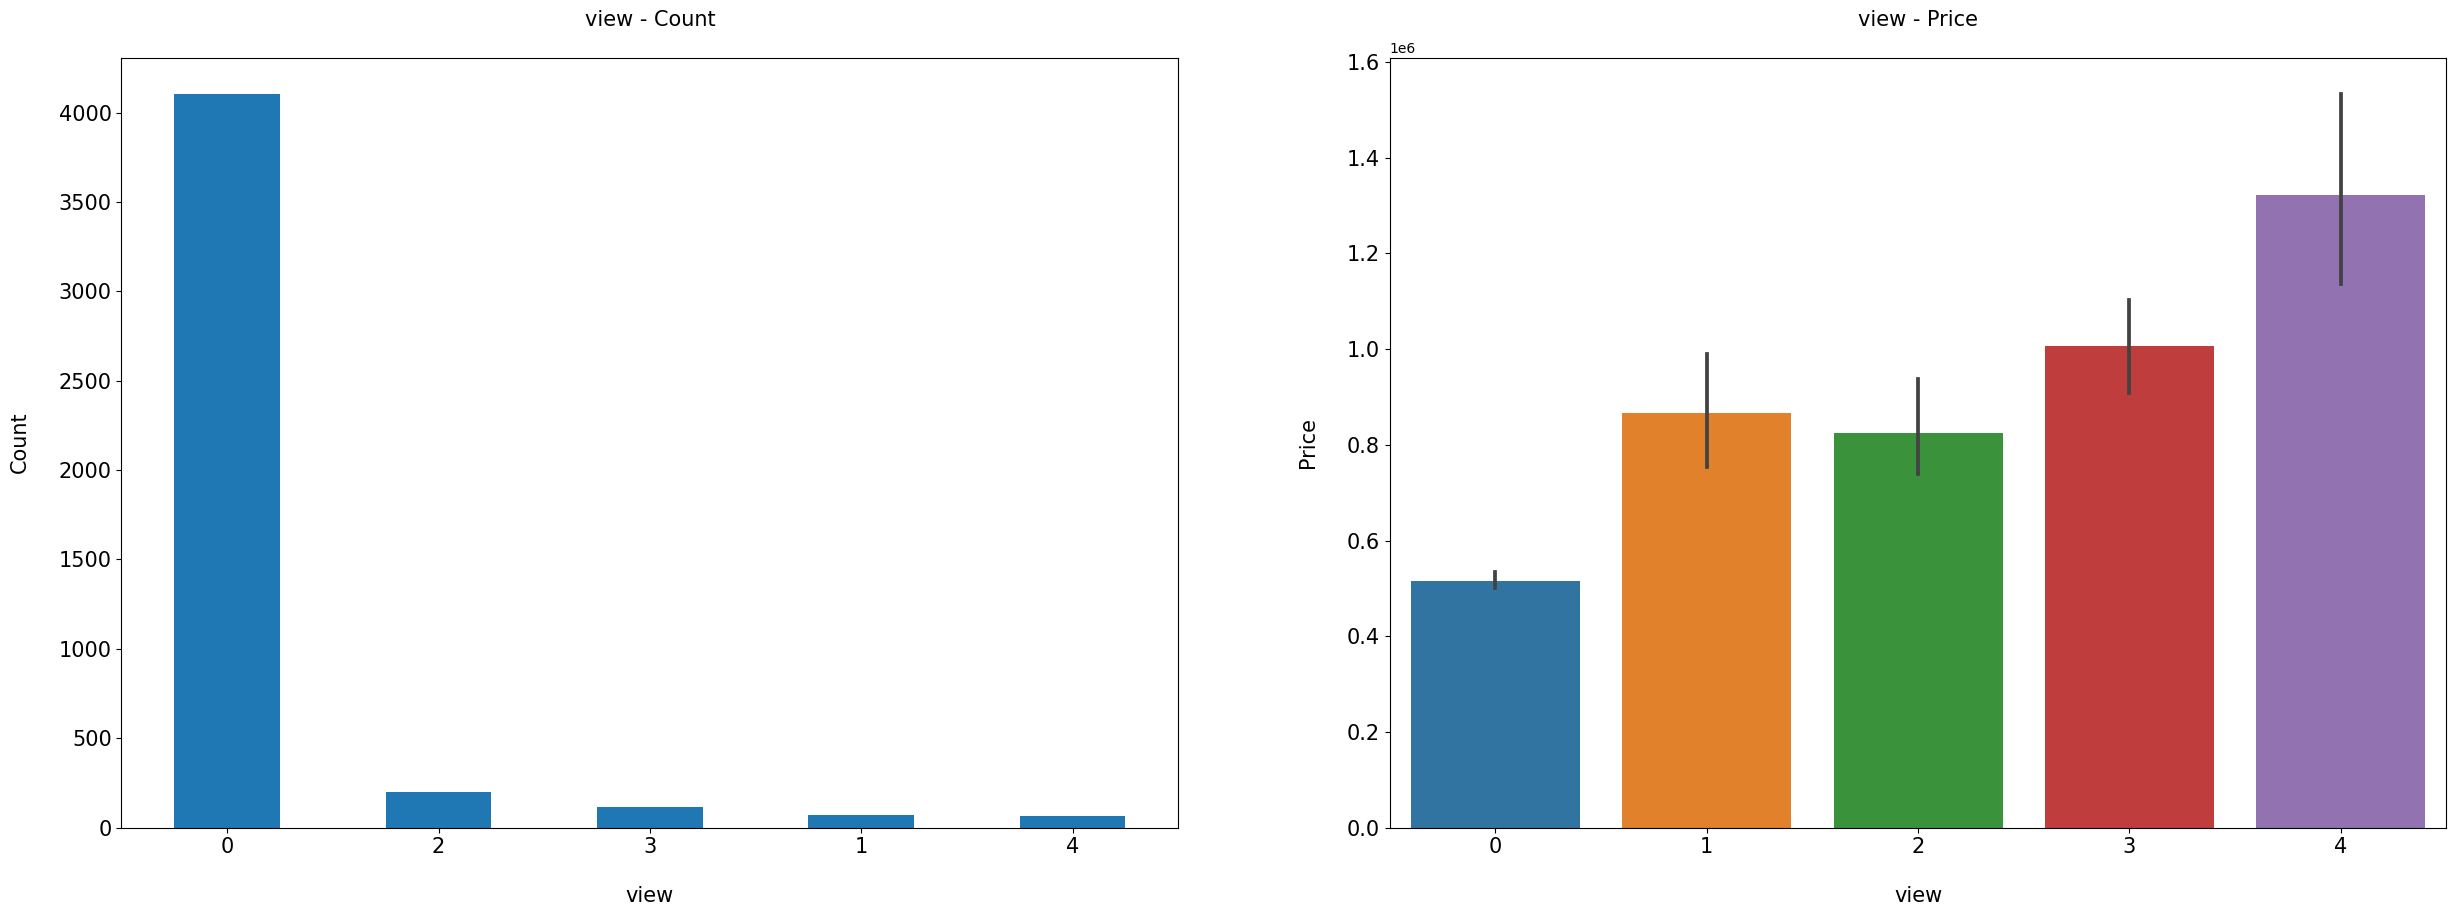

In [23]:
Categorical_Plot("view")

We can see that the 0 view level houses are the most frequent and view levels of 4 are the costliest

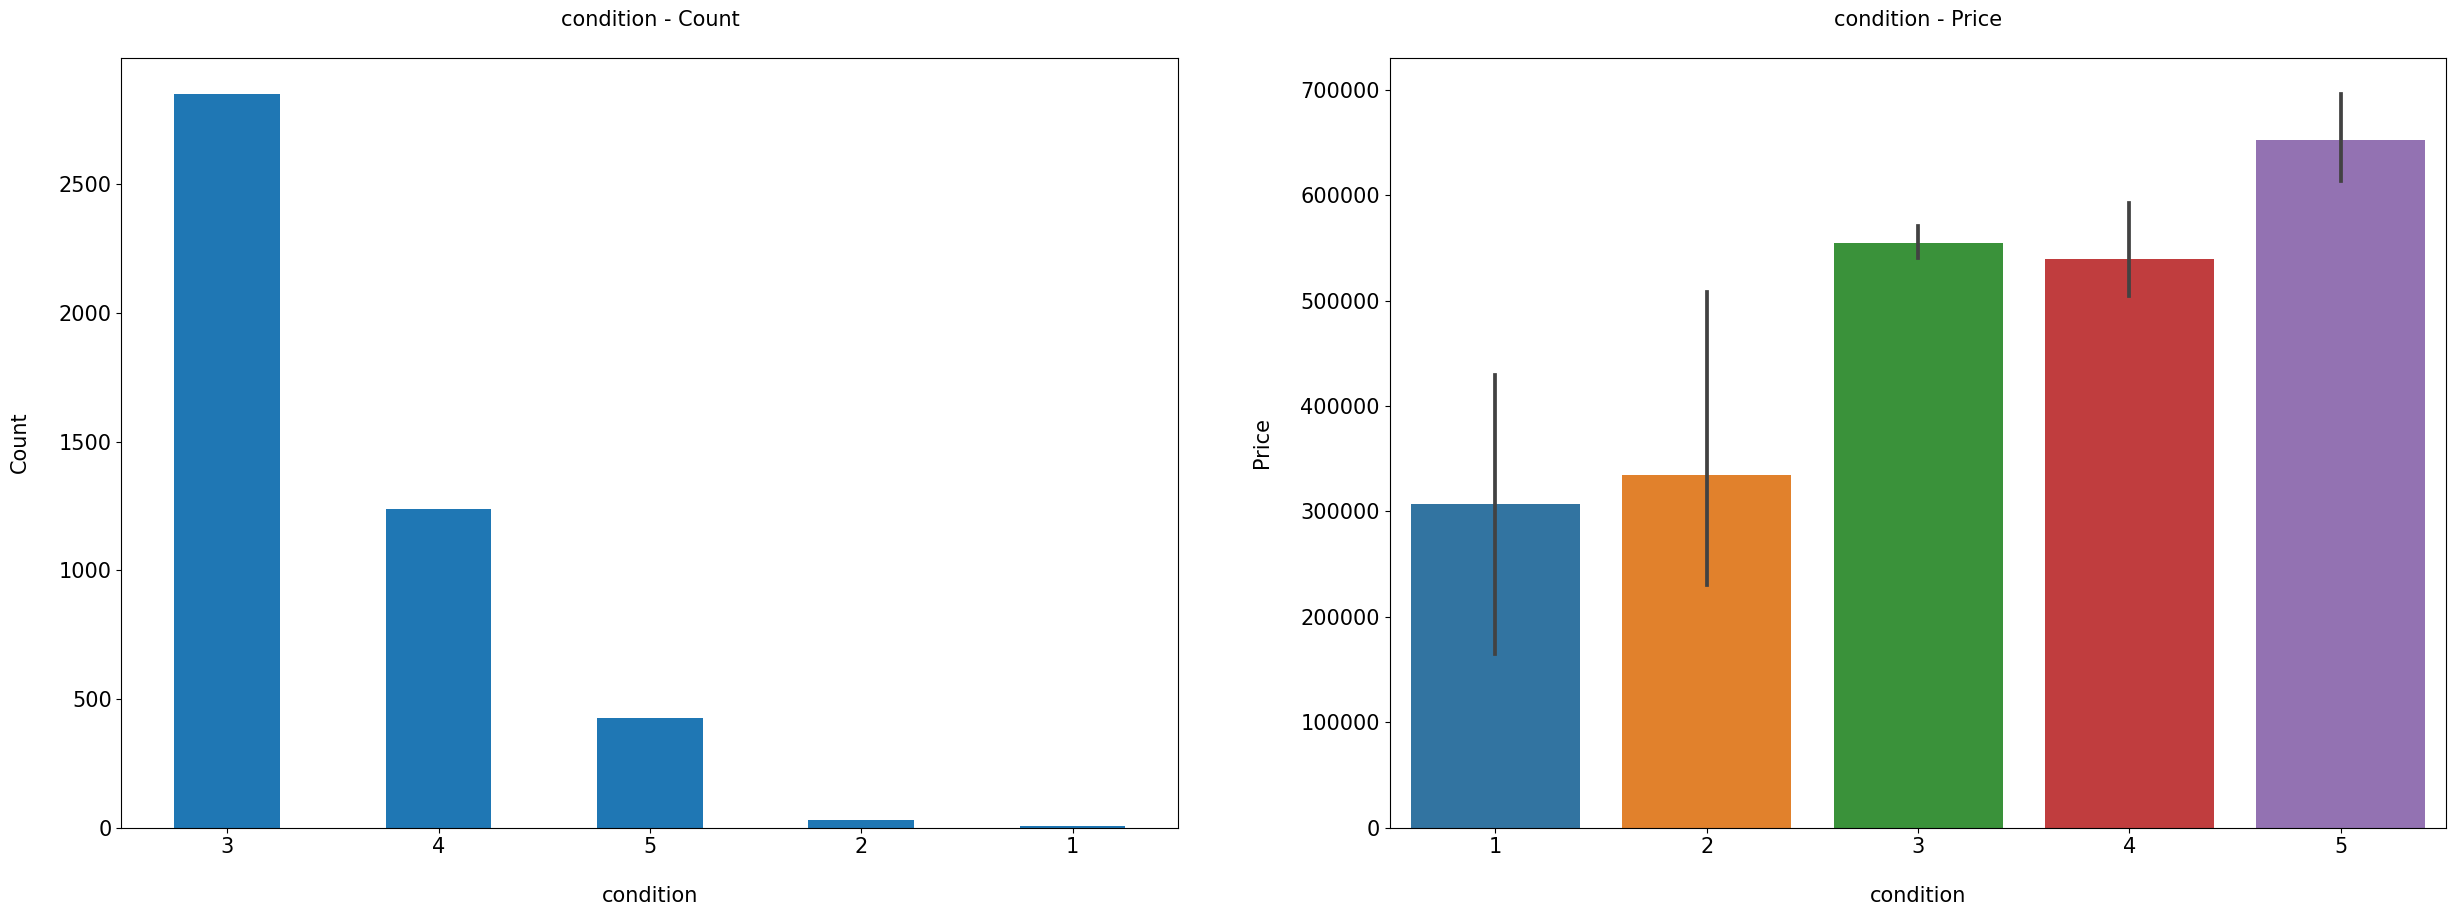

In [24]:
Categorical_Plot("condition")

We can see that living conditions of 3 are the most frequent and the living conditions of 5 are the costliest

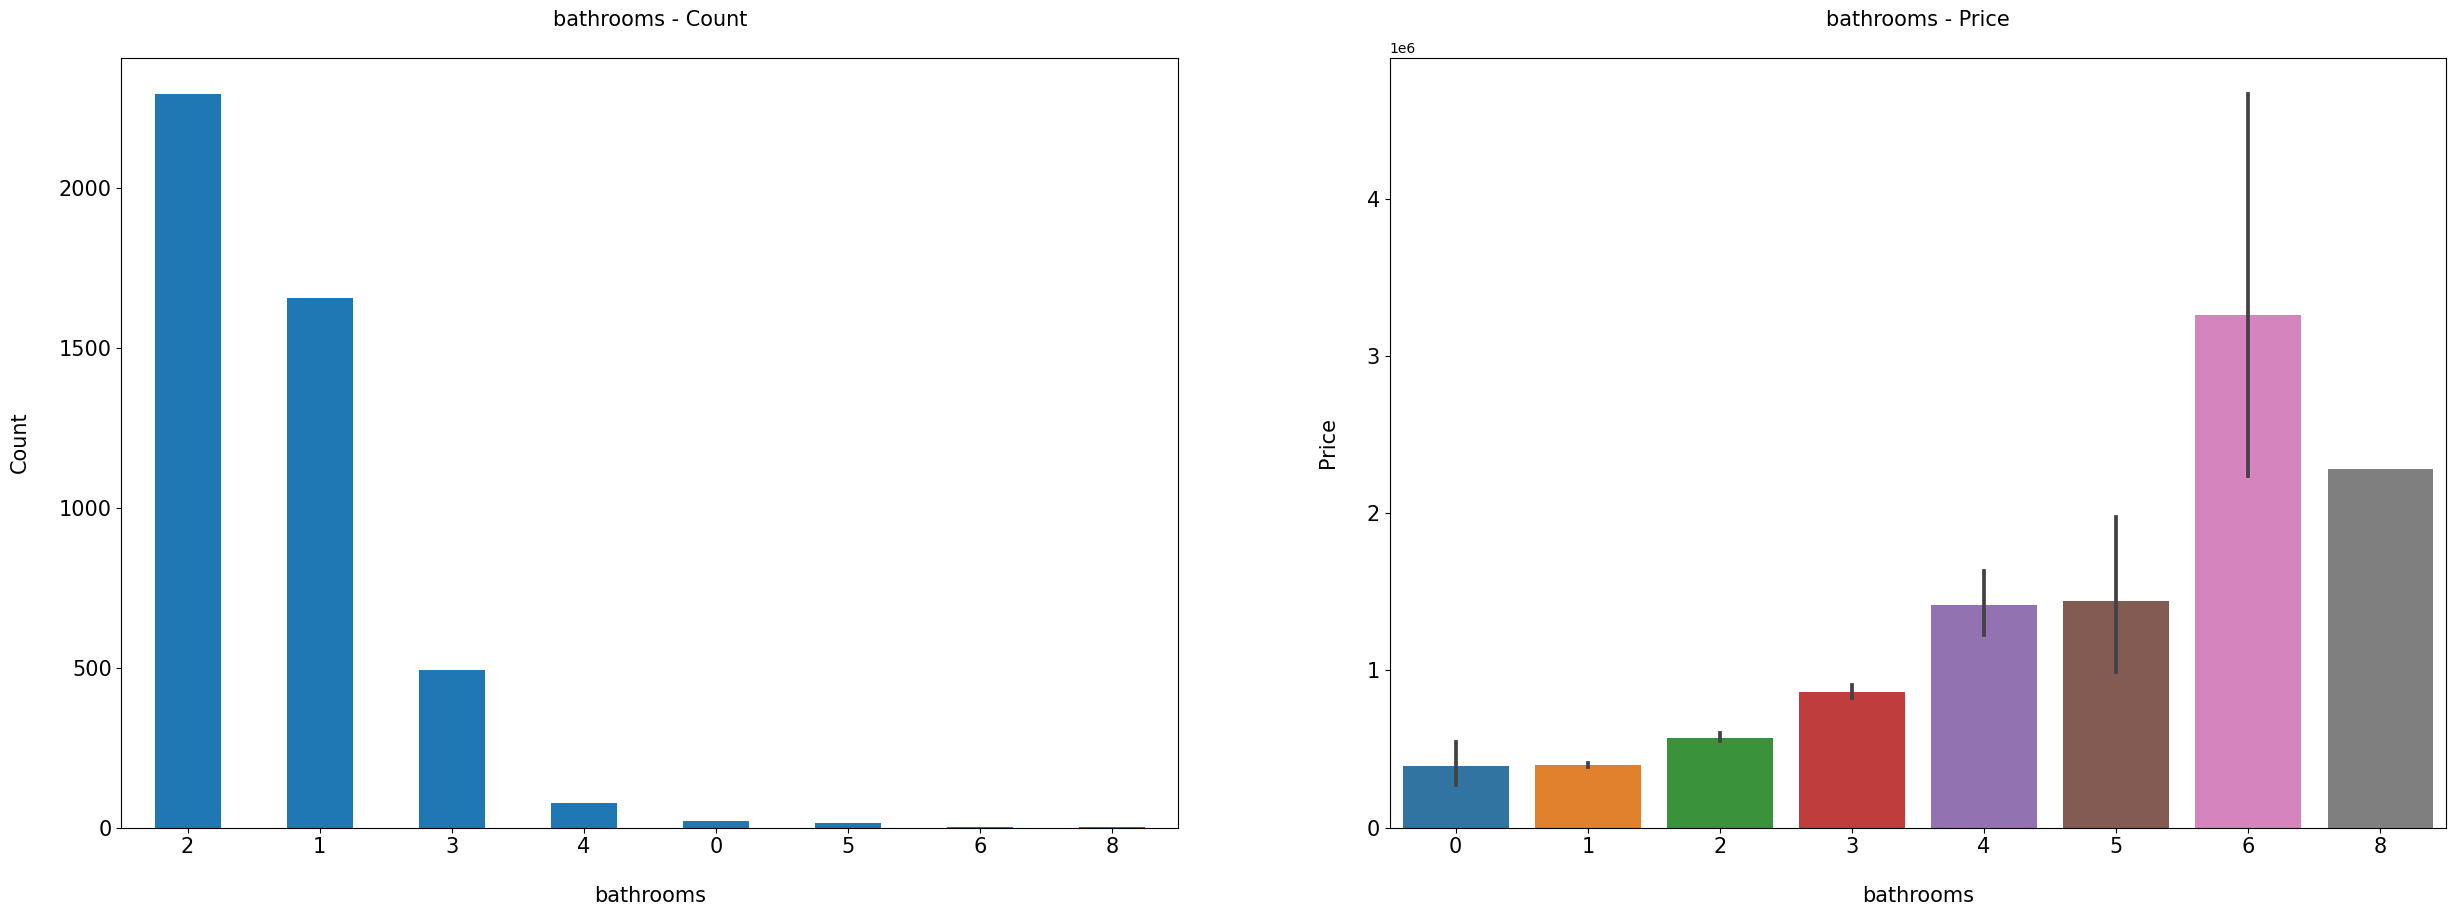

In [21]:
Categorical_Plot("bathrooms")

2 bathroom houses are the most frequent and the prices of the 6 bathroom houses are the highest

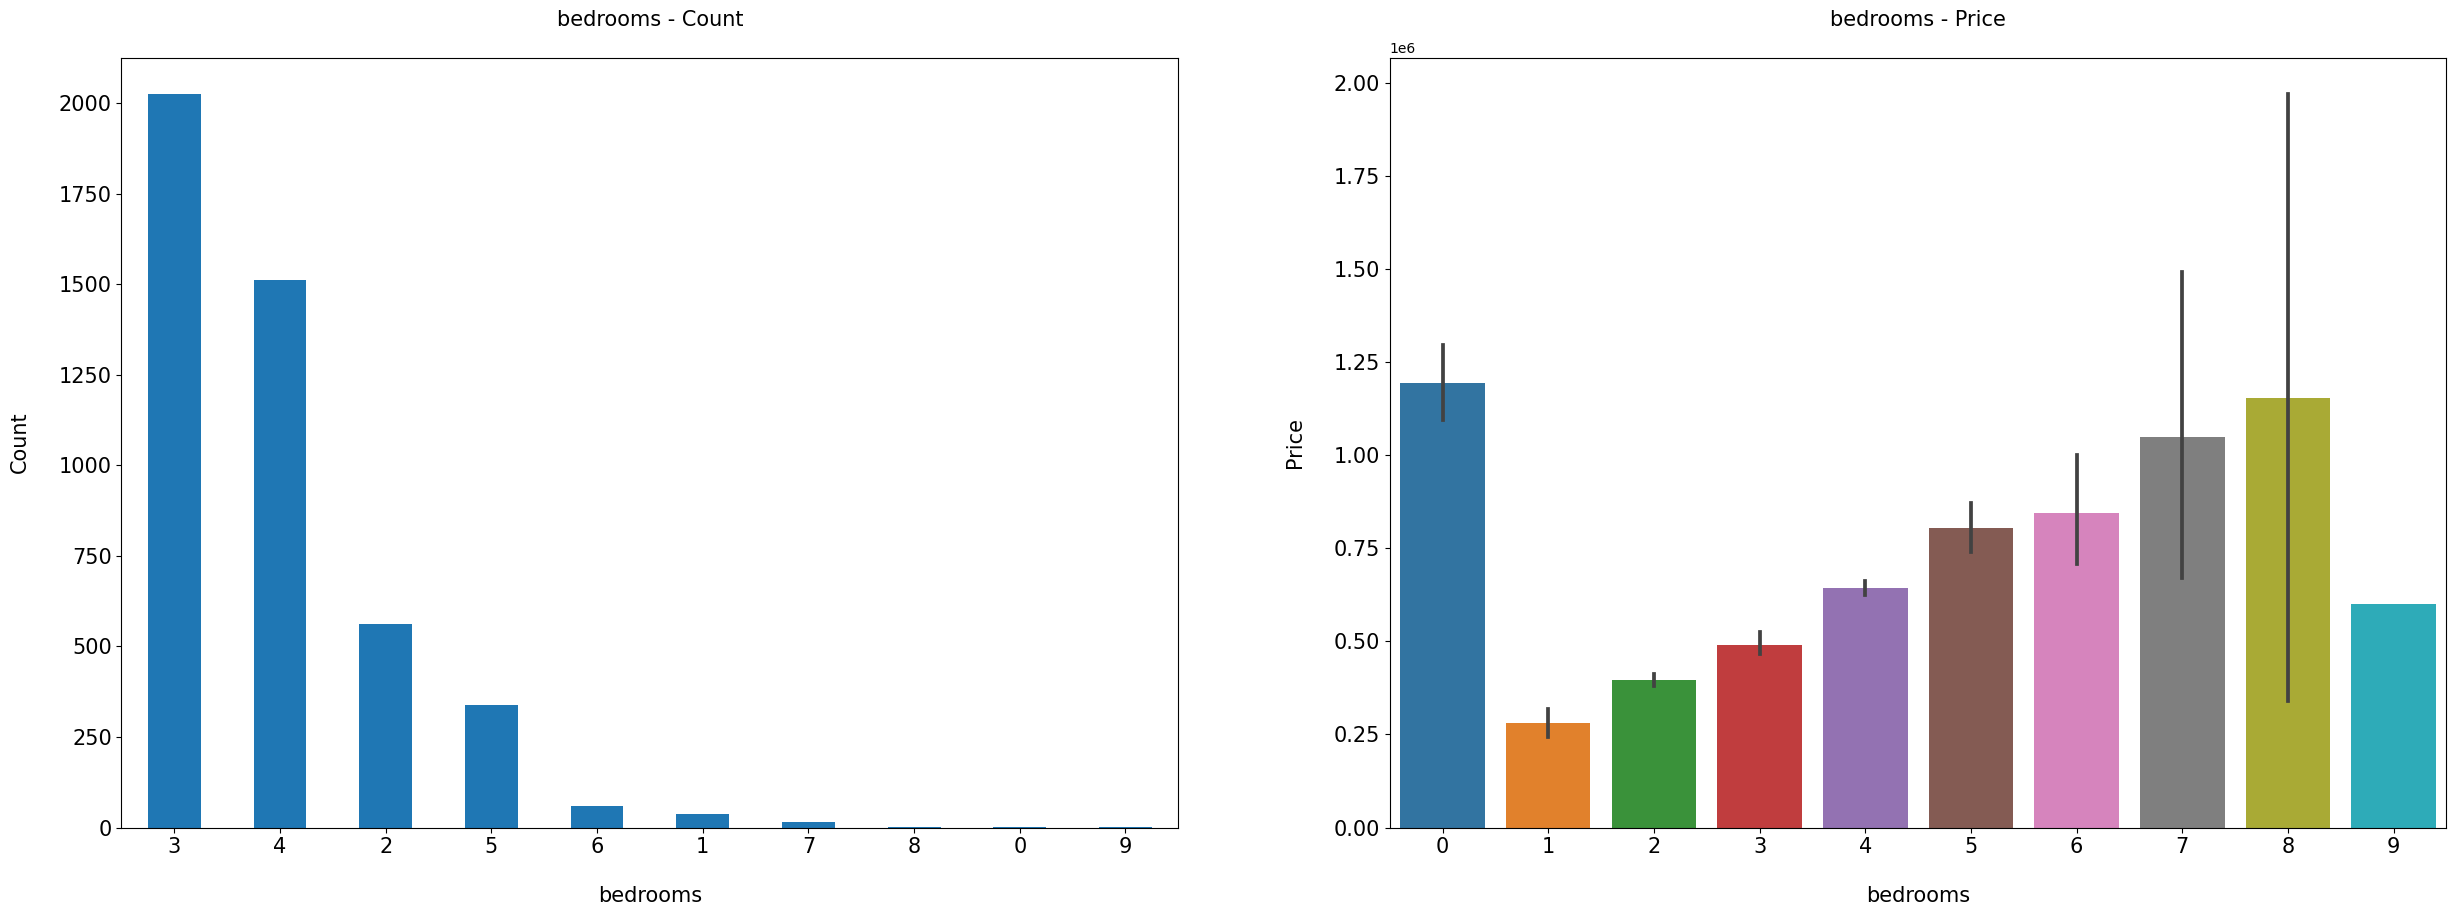

In [20]:
Categorical_Plot("bedrooms")

3-Bedroom houses are the most frequent and the prices of 8-bedroom houses are the highest

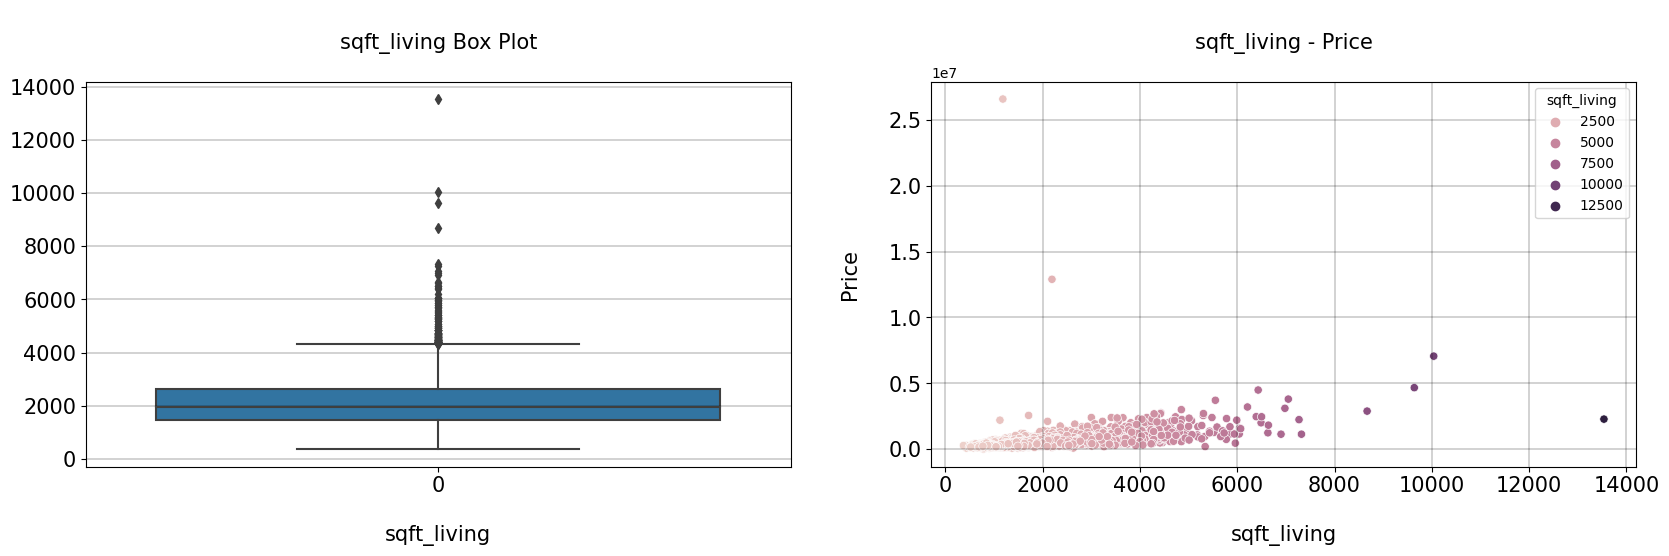

In [26]:
Numerical_Plot("sqft_living")

From the scatter plot, we can infer that as sqft_living increases, price of that house also increases

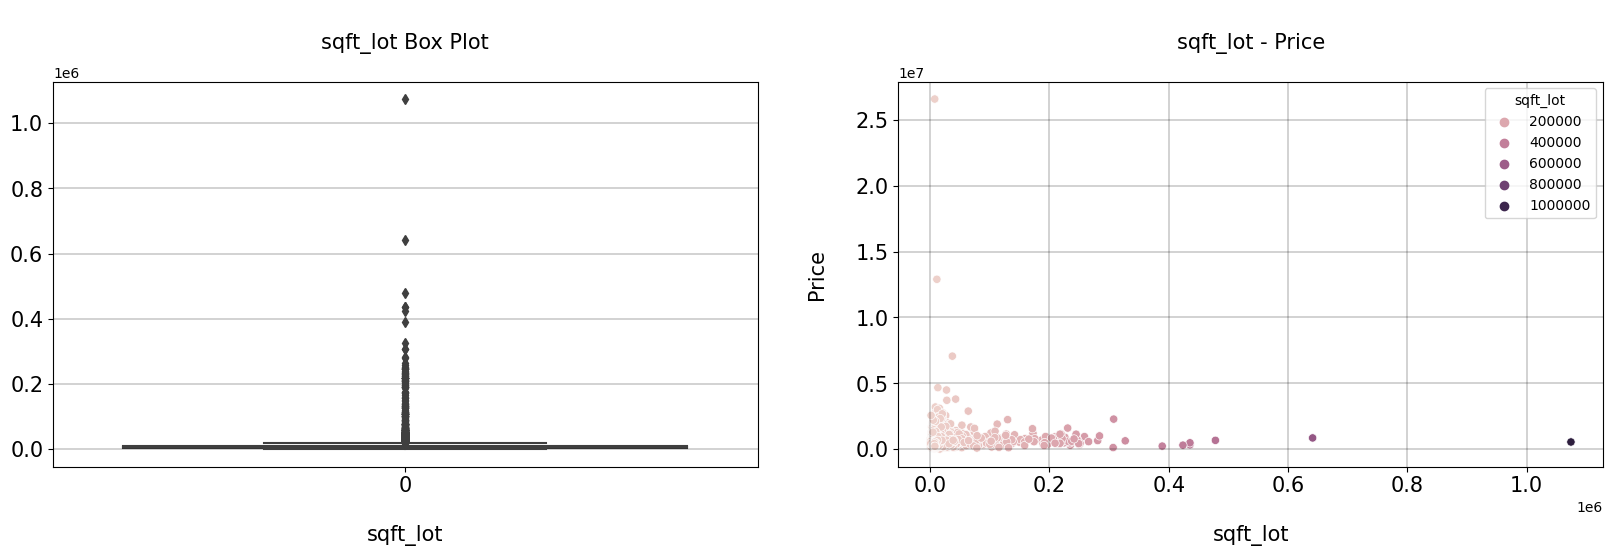

In [27]:
Numerical_Plot("sqft_lot")

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

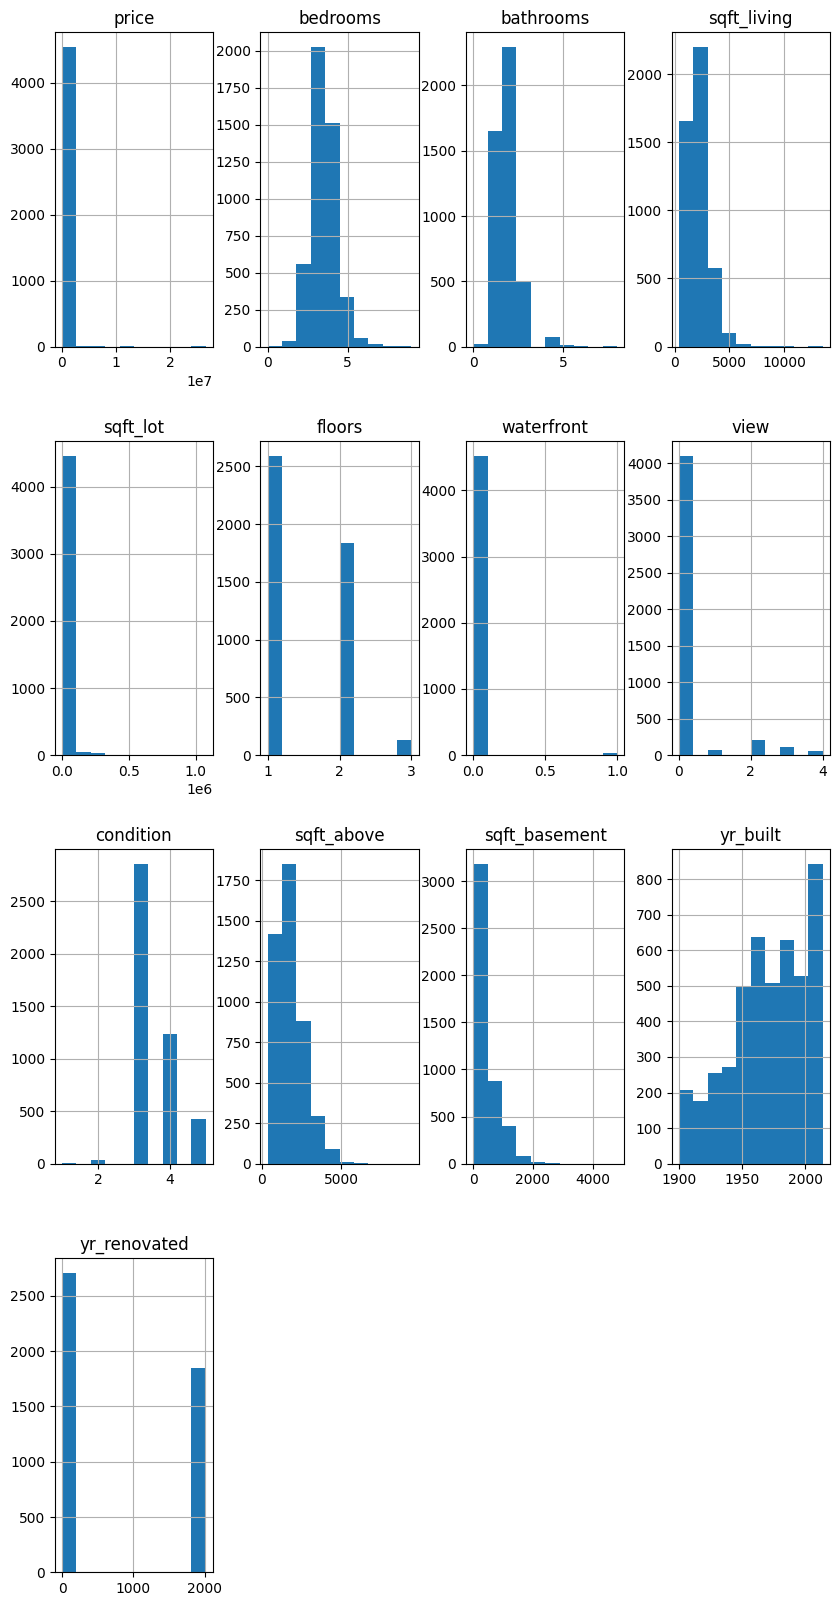

In [29]:
data.hist(figsize=(10,20))

In [10]:
#Average price by US State
avg_prices = pd.DataFrame(data.groupby(['city'])['price'].mean())
avg_prices

,price
city,
Algona,2.072880e+05
Auburn,2.993404e+05
Beaux Arts Village,7.450000e+05
Bellevue,8.471807e+05
Black Diamond,3.396056e+05
Bothell,4.814419e+05
Burien,3.489472e+05
Carnation,5.087520e+05
Clyde Hill,1.321945e+06


In [13]:
avg_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, Algona to Yarrow Point
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   44 non-null     float64
dtypes: float64(1)
memory usage: 704.0+ bytes


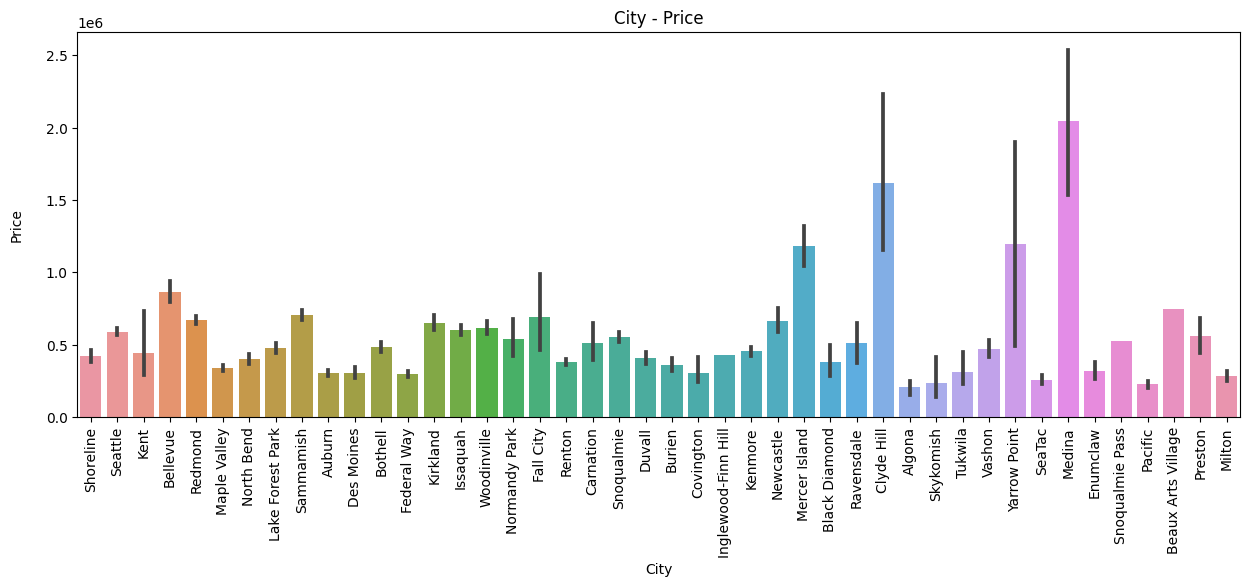

In [25]:
plt.figure(figsize=(15, 5))
sns.barplot(x = data['city'], y = data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

In [37]:
for i in ["yr_built" , "yr_renovated"]:
    data[i] = pd.cut(data[i] ,
                     bins = [j for j in range(1880 , 2030 , 10)] ,
                     labels = [k for k in range(1880 ,2020 , 10)])
    data[i] = data[i].astype(float)

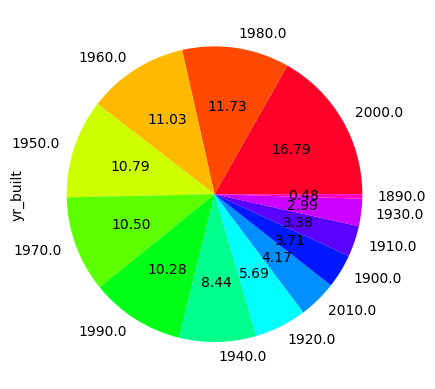

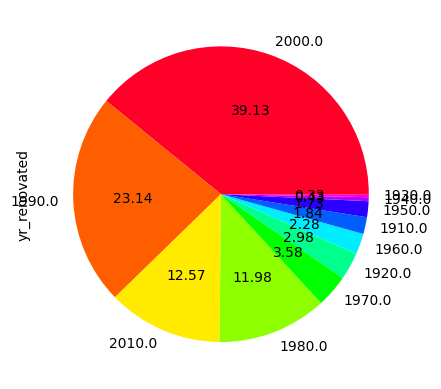

In [38]:
for i in ["yr_built" , "yr_renovated"]:
    data[i].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")
    plt.show()

In 2000s, most of the houses were built and renovated

In [32]:
df = data.drop(['date', 'street', 'statezip', 'country','sqft_above','city'], axis = 1)
columns = df.columns
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1,1340,7912,1,0,0,3,0,1955,2005
1,2384000.0,5,2,3650,9050,2,0,4,5,280,1921,0
2,342000.0,3,2,1930,11947,1,0,0,4,0,1966,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1963,0
4,550000.0,4,2,1940,10500,1,0,0,4,800,1976,1992


SMOOTHING BY BIN MEANS and BIN BOUNDARIES

For the Attribute "yr_built"

In [53]:
#Bin Means
yr = np.sort(df['yr_built'])
yr_bin = np.zeros((450,10))
for i in range (0,4500,10):
    k=int(i/10)
    mean=(yr[i] + yr[i+1] + yr[i+2] + yr[i+3] + yr[i+4]+ yr[i+5] + yr[i+6] + yr[i+7] + yr[i+8] + yr[i+9])/10
    for j in range(10):
        yr_bin[k,j]=mean
print("Bin Mean for Year Built: \n",yr_bin)

Bin Mean for Year Built: 
 [[1900.  1900.  1900.  ... 1900.  1900.  1900. ]
 [1900.  1900.  1900.  ... 1900.  1900.  1900. ]
 [1900.8 1900.8 1900.8 ... 1900.8 1900.8 1900.8]
 ...
 [2013.7 2013.7 2013.7 ... 2013.7 2013.7 2013.7]
 [2014.  2014.  2014.  ... 2014.  2014.  2014. ]
 [2014.  2014.  2014.  ... 2014.  2014.  2014. ]]


In [52]:
yr_binb = np.zeros((900,5))
# Bin boundaries
for i in range (0,4500,5):
    k=int(i/5)
    for j in range (5):
        if (yr[i+j]-yr[i]) < (yr[i+4]-yr[i+j]):
            yr_binb[k,j]=yr[i]
        else:
            yr_binb[k,j]=yr[i+4]
print("Bin Boundaries for Year Built: \n",yr_binb)

Bin Boundaries for Year Built: 
 [[1900. 1900. 1900. 1900. 1900.]
 [1900. 1900. 1900. 1900. 1900.]
 [1900. 1900. 1900. 1900. 1900.]
 ...
 [2014. 2014. 2014. 2014. 2014.]
 [2014. 2014. 2014. 2014. 2014.]
 [2014. 2014. 2014. 2014. 2014.]]


For the Attribute "sqft_above"

In [54]:
#Bin Means
sqft = np.sort(data['sqft_above'])
sqft_bin = np.zeros((450,10))
for i in range (0,4500,10):
    k=int(i/10)
    mean=(sqft[i] + sqft[i+1] + sqft[i+2] + sqft[i+3] + sqft[i+4]+ sqft[i+5] + sqft[i+6] + sqft[i+7] + sqft[i+8] + sqft[i+9])/10
    for j in range(10):
        sqft_bin[k,j]=mean
print("Bin Mean for Year Built: \n",sqft_bin)

Bin Mean for Year Built: 
 [[ 482.   482.   482.  ...  482.   482.   482. ]
 [ 615.   615.   615.  ...  615.   615.   615. ]
 [ 660.   660.   660.  ...  660.   660.   660. ]
 ...
 [4220.5 4220.5 4220.5 ... 4220.5 4220.5 4220.5]
 [4280.  4280.  4280.  ... 4280.  4280.  4280. ]
 [4383.  4383.  4383.  ... 4383.  4383.  4383. ]]


In [55]:
sqft_binb = np.zeros((900,5))
# Bin boundaries
for i in range (0,4500,5):
    k=int(i/5)
    for j in range (5):
        if (sqft[i+j]-sqft[i]) < (sqft[i+4]-sqft[i+j]):
            sqft_binb[k,j]=yr[i]
        else:
            sqft_binb[k,j]=sqft[i+4]
print("Bin Boundaries for Year Built: \n",sqft_binb)

Bin Boundaries for Year Built: 
 [[1900. 1900. 1900.  490.  490.]
 [1900.  560.  560.  560.  560.]
 [1900. 1900. 1900.  620.  620.]
 ...
 [2014. 2014. 2014. 2014. 4320.]
 [2014. 2014. 4380. 4380. 4380.]
 [2014. 4410. 4410. 4410. 4410.]]


MIN-MAX NORMALISATION

In [33]:
scaler = MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(df), columns = columns)
normal.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,0.000000,0.482456,0.995531
1,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,0.058091,0.184211,0.000000
2,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000
3,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000
4,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076
5,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,0.000000,0.333333,0.990070
6,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,0.000000,0.666667,0.000000
7,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,0.000000,0.780702,0.000000
8,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,0.178423,0.745614,0.000000
9,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,0.000000,0.394737,0.998014


Z-SCORE NORMALIZATION/STANDARDISATION

In [35]:
zscaler = MinMaxScaler(feature_range = (0, 1))
standard = pd.DataFrame(zscaler.fit_transform(df), columns = columns)
standard.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,0.000000,0.482456,0.995531
1,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,0.058091,0.184211,0.000000
2,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000
3,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000
4,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076
5,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,0.000000,0.333333,0.990070
6,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,0.000000,0.666667,0.000000
7,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,0.000000,0.780702,0.000000
8,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,0.178423,0.745614,0.000000
9,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,0.000000,0.394737,0.998014
